# Investigate a dataset

##### I have considered Titanic data to investigate

--- Possible questions:

1. Factors which made people to survive
    a) Sex
    b) Age
    c) Fare
    d) Pclass
    e) Port of embarkation
2. Find the percentage of people who survived
3. Classify survival based on sex


In [1]:
import pandas as pd

titanic_data = pd.read_csv('titanic-data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looks like there are few columns based on which we can review the survival rates.

In [2]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Checking the dataframe to find the number of people survived

In [3]:
survived = len(titanic_data[titanic_data.Survived == 1])
not_survived = len(titanic_data[titanic_data.Survived == 0])

print 'Survived:',survived
print 'Not survived:',not_survived

Survived: 342
Not survived: 549


#### Plot to show the percentage of survived vs not survived

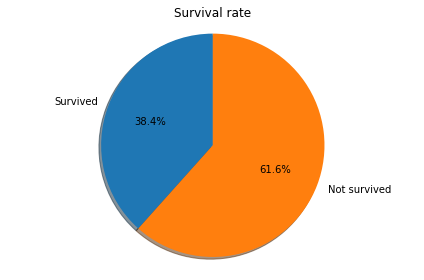

In [4]:
import matplotlib.pyplot as plt


labels = ['Survived', 'Not survived']
sizes = [survived, not_survived]

plt.title('Survival rate')
plt.pie(sizes, labels = labels,shadow = True, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [5]:
children_titanic = titanic_data[titanic_data.Age < 6]
print 'Total no of children on Titanic',len(children_titanic)

child_survivor = len(titanic_data.query('Survived == 1 and Age < 6'))
print 'No of children survived',child_survivor


Total no of children on Titanic 44
No of children survived 31


Since the number of children who survived more were below the age of 6 years, I chose children below 6 years.

##### Distribution of survival for men, women and children below 6 years

In [6]:
#children_titanic = titanic_data[titanic_data.Age < 10]
#print 'Total no of children less than 10yrs in Titanic',len(children_titanic)

#Checking the male child count to get the adult male survival percentage

male_child_survivor = len(titanic_data.query('Survived == 1 and Sex == "male" and Age < 6'))
print 'No of male children below 6 years survived',male_child_survivor

female_child_survivor = len(titanic_data.query('Survived == 1 and Sex == "female" and Age < 6'))
print 'No of female children below 6 years survived',female_child_survivor

male_survival = len(titanic_data[['Pclass', 'Survived', 'Sex', 'Age']].query('Survived == 1 and Sex == "male"'))
print 'No of male survived:' ,(male_survival - male_child_survivor)

female_survival = len(titanic_data[['Pclass', 'Survived', 'Sex', 'Age']].query('Survived == 1 and Sex == "female"'))
print 'No of female survived:' ,(female_survival-female_child_survivor)


#Actual sex ratio
children_titanic_male = len(titanic_data.query('Sex == "male" and Age < 6'))
print'No of male children below 6 years in Titanic:',children_titanic_male

children_titanic_female = len(titanic_data.query('Sex == "female" and Age < 6'))
print'No of female children below 6 years in Titanic:',children_titanic_female

male_titanic = len(titanic_data[titanic_data.Sex == 'male'])- children_titanic_male
print'No of males in Titanic:',male_titanic 

female_titanic = len(titanic_data[titanic_data.Sex == 'female']) - children_titanic_female
print'No of females in Titanic:',female_titanic 



No of male children below 6 years survived 15
No of female children below 6 years survived 16
No of male survived: 94
No of female survived: 217
No of male children below 6 years in Titanic: 23
No of female children below 6 years in Titanic: 21
No of males in Titanic: 554
No of females in Titanic: 293


So among the **342** people who survived, **94** were male, **217** were female and **31** children survived.

#### Plot to show the distribution of survival for men, women and children below 6 years of age. 

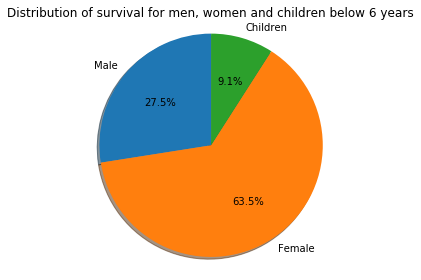

In [7]:

labels = ['Male', 'Female', 'Children']
sizes = [male_survival - male_child_survivor, female_survival - female_child_survivor, female_child_survivor + male_child_survivor]

plt.title('Distribution of survival for men, women and children below 6 years')
plt.pie(sizes, labels = labels,shadow = True, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.tight_layout()
plt.show()


We can see that **women had a better chance of survival than men** on titanic.

##### Deeper analysis based on sex

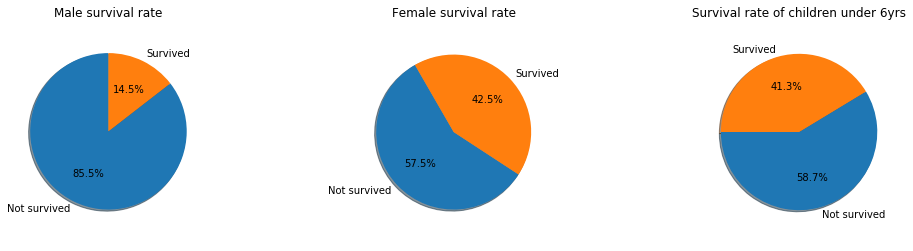

In [68]:
#plt.subplot(3,1,1)
#labels = ['Not survived', 'Survived']
#sizes = [male_titanic, male_survival - male_child_survivor]

#plt.title('Male survival rate')
#plt.pie(sizes, labels = labels,shadow = True, autopct='%1.1f%%', startangle=90)

#plt.axis('equal')
#plt.tight_layout()
#plt.show()

#plt.subplot(3,1,2)
#labels = ['Not survived', 'Survived']
#sizes = [female_titanic, female_survival - female_child_survivor]

#plt.title('Female survival rate')
#plt.pie(sizes, labels = labels,shadow = True, autopct='%1.1f%%', startangle=90)

#plt.axis('equal')
#plt.tight_layout()
#plt.show()

#plt.subplot(3,1,3)
#labels = ['Not survived', 'Survived']
#sizes = [children_titanic_male + children_titanic_female, male_child_survivor + female_child_survivor]

#plt.title('Children survival rate')
#plt.pie(sizes, labels = labels,shadow = True, autopct='%1.1f%%', startangle=90)

#plt.axis('equal')
f, axarr = plt.subplots(1,3)

labels1 = ['Not survived', 'Survived']
sizes1 = [male_titanic, male_survival - male_child_survivor]

axarr[0].set_title('Male survival rate')
axarr[0].pie(sizes1, labels = labels1,shadow = True, autopct='%1.1f%%', startangle=90)
axarr[0].axis('equal')

labels2 = ['Not survived', 'Survived']
sizes2 = [female_titanic, female_survival - female_child_survivor]


axarr[1].set_title('Female survival rate')
axarr[1].pie(sizes2, labels = labels2,shadow = True, autopct='%1.1f%%', startangle=120)
axarr[1].axis('equal')


labels3 = ['Not survived', 'Survived']
sizes3 = [children_titanic_male + children_titanic_female, male_child_survivor + female_child_survivor]

axarr[2].set_title('Survival rate of children under 6yrs')
axarr[2].pie(sizes3, labels = labels3,shadow = True, autopct='%1.1f%%', startangle=180)
axarr[2].axis('equal')

f.subplots_adjust(left = 1,right = 3, wspace=1)
plt.show()

The above plots  clearly show that **women and children had better survival rates than men **.

#### Let's look at some other factors for survival

###### Did the class(Pclass) affect the survival rate?

In [9]:
pclass_survival = titanic_data[['Pclass', 'Survived', 'Sex']].query('Survived == 1')
pclass1_freq = len(pclass_survival[pclass_survival.Pclass == 1])
pclass2_freq = len(pclass_survival[pclass_survival.Pclass == 2])
pclass3_freq = len(pclass_survival[pclass_survival.Pclass == 3])
print pclass1_freq 
print pclass2_freq
print pclass3_freq
#pclass_survival.head(30)

136
87
119


#####  Plot graph of survival Pclass

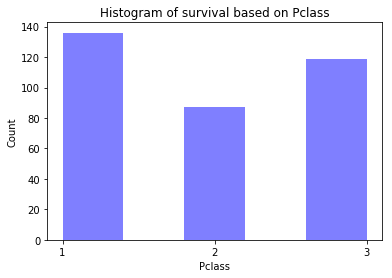

In [21]:
from pylab import hist, show, xticks
#pclass_survival.hist(column = 'Pclass', bins = 10)
  #plt.bar(pclass_survival['Pclass'],[pclass1_freq, pclass2_freq, pclass3_freq])
  #plt.xticks(pclass_survival['Pclass'], ['1','2','3']);
#plt.xlim(1, 3)
#plt.xticks(1,2,3)
n,bins,patches = plt.hist(pclass_survival.Pclass, 5, facecolor='blue', alpha = 0.5)
xticks(range(1,4))
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title(r'Histogram of survival based on Pclass')
plt.show()

Hmmm. This looks interesting where more number of people have survived in class 3(lower class) when compared to class 2. Lets dig into the data to get more insights about the class(pclass).

In [69]:
total_pclass_1 = len(titanic_data.query('Pclass == 1' ))
print total_pclass_1

total_pclass_2 = len(titanic_data.query('Pclass == 2' ))
print total_pclass_2

total_pclass_3 = len(titanic_data.query('Pclass == 3' ))
print total_pclass_3

#136
#87
#119


216
184
491


##### Sorting dataframe by Fare in descending order

In [6]:
sort_fare = titanic_data.sort_values('Fare',ascending = False)
sort_fare.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
